In [1]:
!pip install mediapipe --user

In [2]:
import cv2

def load_image(image_path):
    try:
        image = cv2.imread(image_path)
        if image is not None:
            print("Image loaded successfully.")
            return image
        else:
            print("Failed to load the image. The file may be corrupt or in an unsupported format.")
            return None
    except Exception as e:
        print(f"An error occurred while loading the image: {e}")
        return None

# Example usage:
image_path = "D:\mp\dataset\yawn\91.jpg"
image = load_image(image_path)

Image loaded successfully.



0
1


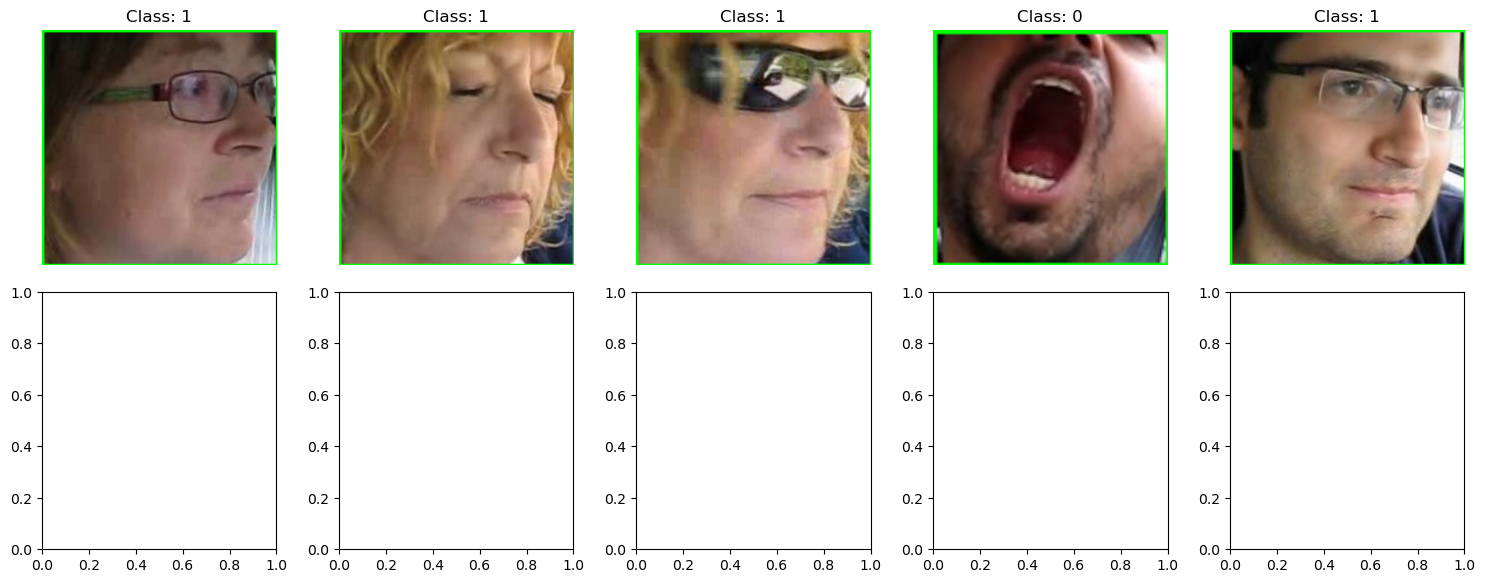

In [3]:
import os
import cv2
import mediapipe as mp
import random
import matplotlib.pyplot as plt  # Import matplotlib

def visualize_data(data):
    # Plot some random samples from the data
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()
    for i in range(5):
        index = random.randint(0, len(data)-1)
        sample, label = data[index]
        axes[i].imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))
        axes[i].set_title('Class: {}'.format(label))
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

def face_for_yawn(direc=r"D:\mp\dataset"):
    yaw_no = []
    IMG_SIZE = 240
    categories = ["yawn", "no_yawn"]

    # Initialize MediaPipe Face Detection
    mp_face_detection = mp.solutions.face_detection
    face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) 
    mp_face_mesh = mp.solutions.face_mesh
    mp_drawing = mp.solutions.drawing_utils
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            image_rgb = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)

            # Convert image to RGB and detect faces
            results = face_detection.process(image_rgb)

            if results.detections:
                for detection in results.detections:
                    bbox = detection.location_data.relative_bounding_box
                    ih, iw, _ = image_array.shape
                    x, y, w, h = int(bbox.xmin * iw), int(bbox.ymin * ih), \
                                 int(bbox.width * iw), int(bbox.height * ih)
                    img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                    roi_color = img[y:y+h, x:x+w]
                    
                    # Check if the face region is not empty before resizing
                    if roi_color.size != 0:
                        resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                        yaw_no.append([resized_array, class_num1])

    return yaw_no

yawn_no_yawn = face_for_yawn()
visualize_data(yawn_no_yawn)


2
3


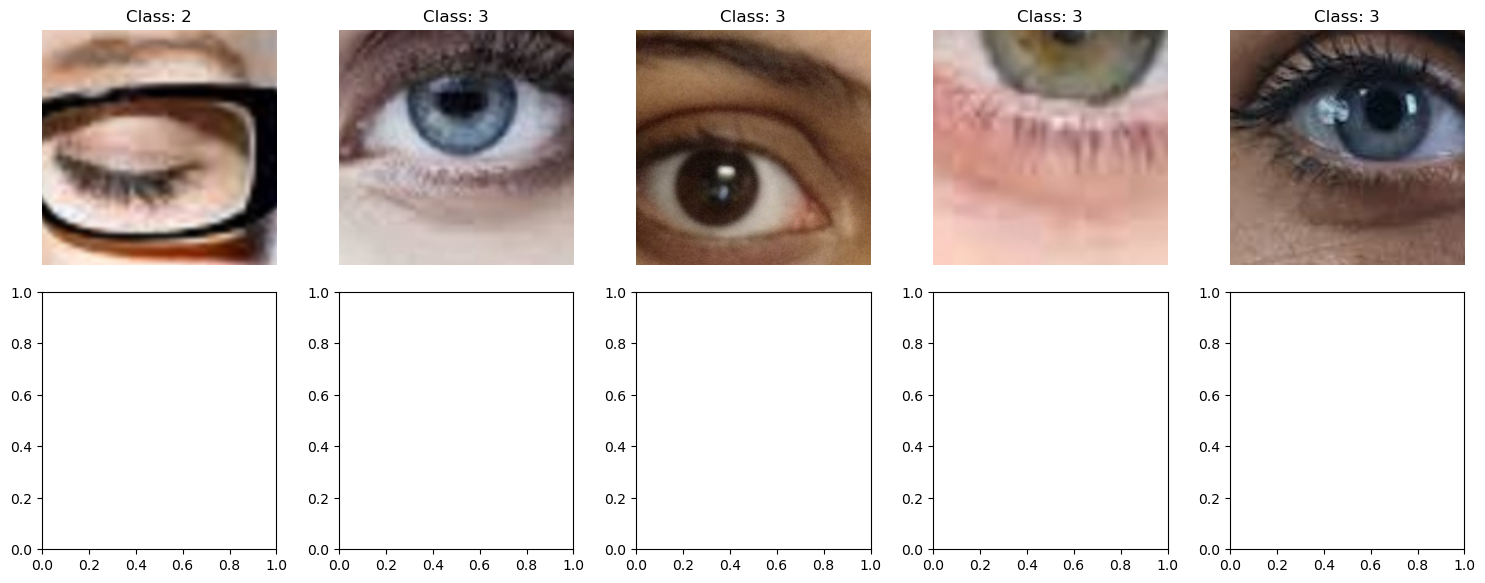

In [4]:
import os
import cv2
import mediapipe as mp

def visualize_data(data):
    # Plot some random samples from the data
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()
    for i in range(5):
        index = random.randint(0, len(data)-1)
        sample, label = data[index]
        axes[i].imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))
        axes[i].set_title('Class: {}'.format(label))
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()
def get_data(dir_path=r"D:\mp\dataset"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 240
    data = []

    # Initialize MediaPipe Face Detection
    mp_face_detection = mp.solutions.face_detection
    face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)

    for label in labels:
        path = os.path.join(os.getcwd(), dir_path, label)
        class_num = labels.index(label)
        class_num += 2  # Increment class number to avoid conflict with face classes
        print(class_num)
        for img in os.listdir(path):
            try:
                image = cv2.imread(os.path.join(path, img))
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Detect face
                results = face_detection.process(image_rgb)
                if results.detections:
                    for detection in results.detections:
                        bbox = detection.location_data.relative_bounding_box
                        ih, iw, _ = image.shape
                        x, y, w, h = int(bbox.xmin * iw), int(bbox.ymin * ih), \
                                     int(bbox.width * iw), int(bbox.height * ih)
                        face_roi = image[y:y+h, x:x+w]

                        # Check if the face region is not empty before resizing
                        if face_roi.size != 0:
                            # Resize face ROI
                            resized_face = cv2.resize(face_roi, (IMG_SIZE, IMG_SIZE))
                            data.append([resized_face, class_num])

            except Exception as e:
                print(e)
    return data  

data_train = get_data()
visualize_data(data_train)


In [5]:
import pandas as pd

def append_data():
    yaw_no = face_for_yawn()
    data = get_data()
    
    # Determine the number of columns in the data
    num_cols = len(data[0]) if data else 0
    
    # Define column names based on the number of columns in the data
    column_names = [f'col{i+1}' for i in range(num_cols)]
    
    # Create a DataFrame from the data with appropriate column names
    df_data = pd.DataFrame(data, columns=column_names)
    
    # Create a DataFrame from yaw_no
    df_yaw_no = pd.DataFrame(yaw_no, columns=['yaw_no_image', 'yaw_no_label'])
    
    # Concatenate both DataFrames along the columns
    df = pd.concat([df_data, df_yaw_no], axis=1)
    
    return df

new_data = append_data()


0
1
2
3


In [6]:
import numpy as np
import os
from PIL import Image
from keras.preprocessing import image

data_dir = r"C:\Users\bhavy\cnn\archive\train"
categories = ['yawn', 'no_yawn', 'Open', 'Closed']


In [7]:
# Function to preprocess an image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert image to grayscale
    img = img.resize((100, 100))  # Adjust size if needed
    img_array = np.array(img)
    return img_array / 255.0  # Normalize pixel values


In [8]:
for category in categories:
    sequences = []
    labels = []
    processed_images_count = 0
    
    folder_path = os.path.join(data_dir, category)
    class_label = categories.index(category)
    
    # Preprocess images and append to sequences and labels lists
    for file_name in os.listdir(folder_path):
        if file_name.startswith('.'):  # Skip hidden files
            continue
        if os.path.isdir(os.path.join(folder_path, file_name)):  # Skip subdirectories
            continue
        try:
            img_array = preprocess_image(os.path.join(folder_path, file_name))
            sequences.append(img_array)
            labels.append(class_label)
            processed_images_count += 1
        except Exception as e:
            print(f"Error processing {os.path.join(folder_path, file_name)}: {e}")

    # Convert sequences and labels to numpy arrays
    sequences = np.array(sequences)
    labels = np.array(labels)

    # Save the preprocessed data for each category
    np.save(f'preprocessed_sequences_{category}.npy', sequences)
    np.save(f'preprocessed_labels_{category}.npy', labels)



In [9]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Reshape
from sklearn.model_selection import train_test_split


In [10]:
categories = ['yawn', 'no_yawn', 'Open', 'Closed']


In [11]:
def load_data(category):
    sequences = np.load(f'preprocessed_sequences_{category}.npy')
    labels = np.load(f'preprocessed_labels_{category}.npy')
    return sequences, labels


In [12]:
all_sequences = []
all_labels = []
for category in categories:
    sequences, labels = load_data(category)
    all_sequences.extend(sequences)
    all_labels.extend(labels)


In [13]:
all_sequences = np.array(all_sequences)
all_labels = np.array(all_labels)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(all_sequences, all_labels, test_size=0.2, random_state=42)


In [15]:
X_train = X_train.reshape(-1, 100, 100, 1)  # Assuming input shape is (100, 100)
X_test = X_test.reshape(-1, 100, 100, 1)


In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))  # Added dense layer after flatten
model.add(Dropout(0.5))  # Add dropout
model.add(Reshape((-1, 128)))  # Reshape for LSTM input
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(64))
model.add(Dropout(0.1))
model.add(Dense(len(categories), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 128)               4

In [49]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=55)


Epoch 1/20
43/43 [==============================] - 33s 607ms/step - loss: 0.2573 - accuracy: 0.8845 - val_loss: 0.2837 - val_accuracy: 0.8724
Epoch 2/20
43/43 [==============================] - 21s 495ms/step - loss: 0.2307 - accuracy: 0.9004 - val_loss: 0.2915 - val_accuracy: 0.8810
Epoch 3/20
43/43 [==============================] - 22s 506ms/step - loss: 0.2855 - accuracy: 0.8806 - val_loss: 0.2845 - val_accuracy: 0.8672
Epoch 4/20
43/43 [==============================] - 22s 509ms/step - loss: 0.2119 - accuracy: 0.9125 - val_loss: 0.2197 - val_accuracy: 0.9086
Epoch 5/20
43/43 [==============================] - 21s 493ms/step - loss: 0.1868 - accuracy: 0.9224 - val_loss: 0.2107 - val_accuracy: 0.9138
Epoch 6/20
43/43 [==============================] - 22s 511ms/step - loss: 0.1639 - accuracy: 0.9302 - val_loss: 0.2012 - val_accuracy: 0.9172
Epoch 7/20
43/43 [==============================] - 23s 527ms/step - loss: 0.1646 - accuracy: 0.9315 - val_loss: 0.1827 - val_accuracy: 0.9293

In [50]:
# Print accuracy
_, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
_, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Train Accuracy: 99.22%
Test Accuracy: 95.34%


In [51]:
model.save('drowsiness_detection_cnn_lstm_model.h5')


C:\Users\bhavy\anaconda32\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
model.save("drowsiness_cnn_lstm_new1.model")


INFO:tensorflow:Assets written to: drowsiness_cnn_lstm_new1.model\assets


INFO:tensorflow:Assets written to: drowsiness_cnn_lstm_new1.model\assets


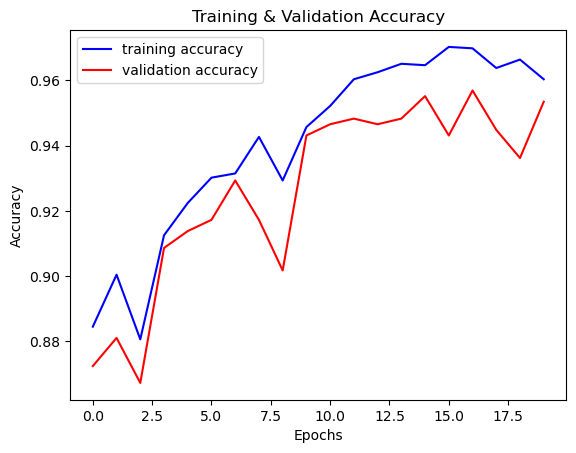

In [53]:
# Plot accuracy and loss plt.legend(): Displays the legend indicating which line corresponds to training and validation accuracy. 
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="training accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show() 


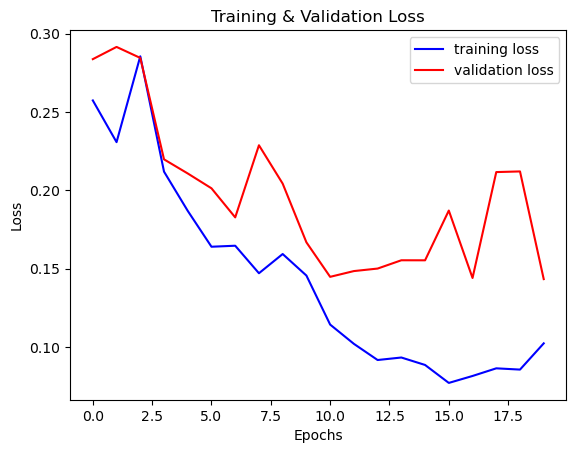

In [54]:
plt.plot(epochs, loss, "b", label="training loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()


In [55]:
s=['closed','open','no_yawn','yawn']

In [56]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Evaluate the model
print(classification_report(y_test, y_pred_classes))


19/19 [==============================] - 1s 74ms/step
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       151
           1       0.88      0.99      0.93       141
           2       0.97      0.99      0.98       149
           3       0.99      0.96      0.98       139

    accuracy                           0.95       580
   macro avg       0.96      0.95      0.95       580
weighted avg       0.96      0.95      0.95       580



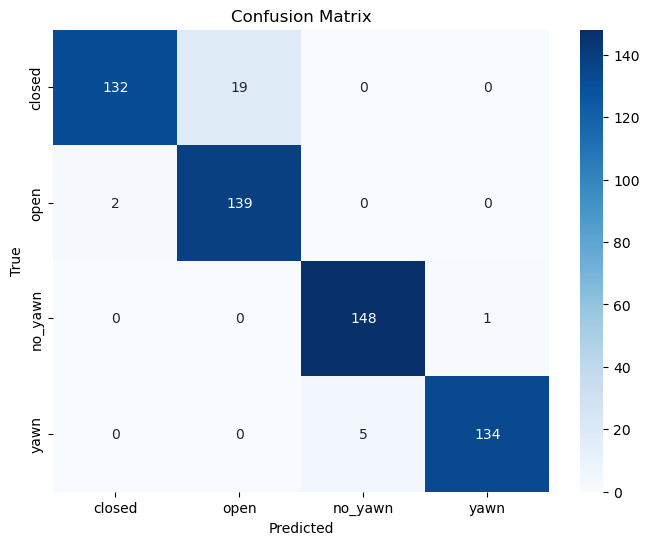

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=s, yticklabels=s)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [58]:
# Print the confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[132  19   0   0]
 [  2 139   0   0]
 [  0   0 148   1]
 [  0   0   5 134]]


In [59]:
# Accuracy Score :ratio of the number of correct predictions to the total number of predictions made.
accuracy = np.sum(y_test == y_pred_classes) / len(y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9534482758620689


In [60]:
import tensorflow as tf
import numpy as np
import cv2

In [61]:
import cv2
import mediapipe as mp

mp_face_detection = mp.solutions.face_detection

IMG_SIZE = 100

def prepare(filepath):
    # Load the image
    img = cv2.imread(filepath, cv2.IMREAD_COLOR)
    
    # Convert the image to RGB (MediaPipe uses RGB images)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Initialize MediaPipe face detection
    with mp_face_detection.FaceDetection(min_detection_confidence=0.5) as face_detection:
        # Convert the RGB image to MediaPipe's format
        results = face_detection.process(img_rgb)
        
        # If faces are detected
        if results.detections:
            # Get the bounding box coordinates of the first detected face
            bboxC = results.detections[0].location_data.relative_bounding_box
            ih, iw, _ = img.shape
            
            # Convert the relative coordinates to absolute coordinates
            xmin = int(bboxC.xmin * iw)
            ymin = int(bboxC.ymin * ih)
            xmax = int((bboxC.xmin + bboxC.width) * iw)
            ymax = int((bboxC.ymin + bboxC.height) * ih)
            
            # Crop the face region from the image
            face_img = img[ymin:ymax, xmin:xmax]
            
            # Resize the cropped face image to the desired size
            resized_array = cv2.resize(face_img, (IMG_SIZE, IMG_SIZE))
            
            # Normalize the pixel values to the range [0, 1]
            resized_array = resized_array / 255
            
            # Return the resized and normalized face image
            return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
        else:
            # If no faces are detected, return None
            return None



In [62]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Define the prepare function to load and preprocess the image
def prepare(filepath, target_size=(100, 100)):
    # Load the image using OpenCV
    img = cv2.imread(filepath)
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Resize the image
    img_resized = cv2.resize(img_gray, target_size)
    # Expand dimensions to make it compatible with the model input shape
    img_expanded = np.expand_dims(img_resized, axis=-1)
    # Normalize pixel values to range [0, 1]
    img_normalized = img_expanded / 255.0
    return img_normalized

# Specify the file path to the image
image_path = r"C:\\Users\\bhavy\\cnn\\archive\\train\\open\\_1.jpg"

# Load the trained model
model = load_model("C:\\Users\\bhavy\\drowsiness_detection_cnn_lstm_model.h5")

# Load and preprocess the image
prepared_image = prepare(image_path)

# Predict using the model
prediction = model.predict(np.array([prepared_image]))

# Get the predicted class label
predicted_class = "drowsy" if prediction[0][0] > 0.5 else "non-drowsy"

# Print the predicted class
print("Predicted class:", predicted_class)


1/1 [==============================] - 4s 4s/step
Predicted class: non-drowsy


In [63]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Define the prepare function to load and preprocess the image
def prepare(filepath, target_size=(100, 100)):
    # Load the image using OpenCV
    img = cv2.imread(filepath)
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Resize the image
    img_resized = cv2.resize(img_gray, target_size)
    # Expand dimensions to make it compatible with the model input shape
    img_expanded = np.expand_dims(img_resized, axis=-1)
    # Normalize pixel values to range [0, 1]
    img_normalized = img_expanded / 255.0
    return img_normalized

# Specify the file path to the image
image_path = r"C:\\Users\\bhavy\\cnn\\archive\\train\\yawn\\91.jpg"

# Load the trained model
model = load_model("C:\\Users\\bhavy\\drowsiness_detection_cnn_lstm_model.h5")

# Load and preprocess the image
prepared_image = prepare(image_path)

# Predict using the model
prediction = model.predict(np.array([prepared_image]))

# Get the predicted class label
predicted_class = "drowsy" if prediction[0][0] > 0.5 else "non-drowsy"

# Print the predicted class
print("Predicted class:", predicted_class)


1/1 [==============================] - 4s 4s/step
Predicted class: drowsy


In [64]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Define the prepare function to load and preprocess the image
def prepare(filepath, target_size=(100, 100)):
    # Load the image using OpenCV
    img = cv2.imread(filepath)
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Resize the image
    img_resized = cv2.resize(img_gray, target_size)
    # Expand dimensions to make it compatible with the model input shape
    img_expanded = np.expand_dims(img_resized, axis=-1)
    # Normalize pixel values to range [0, 1]
    img_normalized = img_expanded / 255.0
    return img_normalized

# Specify the file path to the image
image_path = r"C:\\Users\\bhavy\\cnn\\archive\\train\\no_yawn\\91.jpg"

# Load the trained model
model = load_model("C:\\Users\\bhavy\\drowsiness_detection_cnn_lstm_model.h5")

# Load and preprocess the image
prepared_image = prepare(image_path)

# Predict using the model
prediction = model.predict(np.array([prepared_image]))

# Get the predicted class label
predicted_class = "drowsy" if prediction[0][0] > 0.5 else "non-drowsy"

# Print the predicted class
print("Predicted class:", predicted_class)


1/1 [==============================] - 3s 3s/step
Predicted class: non-drowsy
